# AI and Intrusion Detection

### Comments on the dataset features 

* ***Packets_Flow_IAT_Max and Packets_Flow_IAT_Min***

This feature has great relevance for our model because Packet Flows is a behavior and a way of propagation Internet Worms use to grow and fill with malware networks. Knowing minimum and maximum data will give extra input for the model to detect malware or intrusion attempts. Often the Packet Flows rate can be a good indicator of attacks.


* ***Forward_Header_Length and Backward_Header_Length***

Nowadays plenty of NIDSs Network Intrusion Detection Systems attempt to detect the vast majority of attacks. Many NIDSs catch the attacks with the guide of the analysis of all the packets. Some of these detect attacks by simply making an analysis of  TCP/IP packet headers.

* ***Forward_Packets_per_Second and Backward_Packets_per_Second***

An experiment performed by Waleed Bul'ajoul, Anne James, and Mandeep Pannu demonstrates weaknesses of Network Intrusion Detection Systems, like the inability to process multiple packets and the tendency of packet dropping on heavy traffic loads and high-speed networks avoiding the analysis of the packets.

This shows how malicious packets can pass through a network without being detected, analyzed, or even being dropped, representing a significant threat to an already built and functional network.

* ***Packets_Length_Min, Packets_Length_Max, and Packets_Length_Mean***

The IETF states in specification RFC 791 [50], that an IP header consists of a length of 20 bytes, the  13th to the 16th byte being the source address that emits out the packet. A tcpdump is a program that analyses data network packages and its format comes well defined, you can take advantage while analyzing. Its feature fields values on the header can be identified as treated words, the collection of these values creates a vocabulary of many potential feature values. 16 of these feature fields on the packet header can help identify a vocabulary list of possible intrusion detections.

* ***Packets_Length_Standard_Deviation, Forward_IAT_Total, Forward_IAT_Mean and Forward_IAT_Min, Backward_IAT_Total, Backward_IAT_Mean, and Backward_IAT_Min***

One of the known network attacks is the Heartbleed attack and with Standard Deviation (Std) in the backward packets and length of the forward packets work as an important feature for intrusion detection. These features can help represent brute force attacks, shown as initial window bytes accompanied by flags like Acknowledge (ACK), Push (Psh), and Synchronization (SYN), which are very useful features that help the early detection of attacks.


### Names and descriptions of the dataset features.


|***FEATURE***                          |***DESCRIPTION***                                              |
|---------------------------------------|---------------------------------------------------------------|
| Source_Port                           | Source port.                                                  |
| Destination_Port                      | Destination port.                                             |
| Protocol                              | Protocol.                                                     |
| Flow_Duration                         | Flow duration.                                                |
| Total_Forward_Packets                 | Number of the total packets in forward direction.             |
| Total_Backward_Packets                | Number of the total packets in backward direction.            |
| Total_Length_Forward_Packets          | Total size of packets in forward direction.                   |
| Total_Length_Backward_Packets         | Total size of packets in backward direction.                  |
| Forward_Packets_Length_Max            | Maximum size of packets in forward direction.                 |
| Forward_Packets_Length_Min            | Minimum size of packets in forward direction.                 |
| Forward_Packets_Length_Mean           | Mean size of packets in forward direction.                    |
| Backward_Packets_Length_Max           | Maximum size of packets in backward direction.                |
| Backward_Packets_Length_Min           | Minimum size of packets in forward direction.                 |
| Backward_Packets_Length_Mean          | Mean size of packets in backward direction.                   |
| Packets_Flow_IAT_Mean                 | Mean time between two flows.                                  |
| Packets_Flow_IAT_Standard_Deviation   | Standard deviation time between two flows of packets.         |
| Packets_Flow_IAT_Max                  | Maximum time between two flows of packets.                    |
| Packets_Flow_IAT_Min                  | Minimum time between two flows of packets.                    |
| Forward_IAT_Total                     | Total time between two packets sent in forward direction.     |
| Forward_IAT_Mean                      | Mean time between two packets sent in forward direction.      |
| Forward_IAT_Min                       | Minimum time between two packets sent in forward direction.   |
| Backward_IAT_Total                    | Total time between two packets sent in backward direction.    |
| Backward_IAT_Mean                     | Mean time between two packets sent in backward direction.     |
| Backward_IAT_Min                      | Minimum time between two packets sent in backward direction.  |
| Forward_Header_Length                 | Total bytes used for headers in forward direction.            |
| Backward_Header_Length                | Total bytes used for headers in backward direction.           |
| Forward_Packets_per_Second            | Number of forward packets per second.                         |
| Backward_Packets_per_Second           | Number of backward packets per second.                        |
| Packets_Length_Min                    | Minimum length of flow.                                       |
| Packets_Length_Max                    | Maximum length of flow.                                       |
| Packets_Length_Mean                   | Mean length of flow.                                          |
| Packets_Length_Standard_Deviation     | Standard deviation length of flow.                            |
| Class                                 | Normal traffic or attack (Mirai, DoS, Scan, Spoofing)         |

## Analysing the relevance of features

#### The problem
In this section we will try to address the following question: 

***"How to apply machine learning methods for analysing the relevance of each feature in the intrusion detection problem?***.

#### The approach
The method that we are going to use here is the Desicion Tree Classifier. This method allows to compute so called feature importances. These can be computed as Gini importances (Mean Decrease in Impurity) and Permutation importances (Mean Decrease in Accuracy). Permutation importances are considered to be more robust. In addition, it is easy to visualize models that are based on decisions trees and get more insight on the rules the algorithm creates. Thus, we will be able to understand not only which features are important, but also what values in within the features are critical for the model to make a decision.

#### The process
The goal of this work is **not** to build a very strong model, but to analyse the connection between features and different targets. 
Therefore we do not put a lot of efforts on the model training part. In fact, decision trees behave very differently depending on how features are put together and how the hyper-parameters are chosen. 

In order to keep some consistency in the analysis, we will give the same dataset into the Sciki-Learn's DecisionTreeClassifier with default hyperparameters, and a fixed random state, but with different targets. The targets will be converted into the one-versus-rest (OVR) style, e.g. 'Mirai' equals 1 and the rest,including 'Normal', equal 0. This allows us to build a binary classification model that is easy to interpret, and we also circumvent the dataset imbalance issue to some extent.

We will fit the DecisionTreeClassifier on the whole dataset, compute permutaion importances and create a visualization of the resulting decision trees.



## Data Overview

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read the dataset
data = pd.read_csv('partial-ids-iot-dataset.csv', sep=';')

In [4]:
data.head()

,Source_Port,Destination_Port,Protocol,Flow_Duration,Total_Forward_Packets,Total_Backward_Packets,Total_Length_Forward_Packets,Total_Length_Backward_Packets,Forward_Packets_Length_Max,Forward_Packets_Length_Min,...,Backward_IAT_Min,Forward_Header_Length,Backward_Header_Length,Forward_Packets_per_Second,Backward_Packets_per_Second,Packets_Length_Min,Packets_Length_Max,Packets_Length_Mean,Packets_Length_Standard_Deviation,Class
0,52717,9020,6,98,0,2,0,2776,0,0,...,98,0,64,0.000000,20408.163265,1388,1388,1388.0,0.0,Scan
1,443,43238,6,184,1,1,1441,1441,1441,1441,...,0,32,32,5434.782609,5434.782609,1441,1441,1441.0,0.0,Mirai
2,10000,10101,17,206,2,1,2860,1430,1430,1430,...,0,16,8,9708.737864,4854.368932,1430,1430,1430.0,0.0,Mirai
3,52727,9020,6,141,0,3,0,4164,0,0,...,70,0,96,0.000000,21276.595745,1388,1388,1388.0,0.0,Scan
4,64774,9988,17,8,4,1,128,32,32,32,...,0,32,8,500000.000000,125000.000000,32,32,32.0,0.0,Mirai


In [17]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset.")

There are 9912 rows and 33 columns in the dataset.


In [6]:
# the dataset consists of numeric features without missing values
# this is very convenient for model training
pd.DataFrame([data.dtypes, data.isna().sum()], index=['type','isna_sum']).T

,type,isna_sum
Source_Port,int64,0
Destination_Port,int64,0
Protocol,int64,0
Flow_Duration,int64,0
Total_Forward_Packets,int64,0
Total_Backward_Packets,int64,0
Total_Length_Forward_Packets,int64,0
Total_Length_Backward_Packets,int64,0
Forward_Packets_Length_Max,int64,0
Forward_Packets_Length_Min,int64,0


In [13]:
# amount and share (%) of different classes in the dataset
# dataset in not balanced, this may cause problems when building 
# robust ML models, however this is out the scope of this work
pd.DataFrame([data.Class.value_counts(),
             (data.Class.value_counts(normalize=True)*100).round(2)],
             index=['Amount', 'Share(%)']).T

,Amount,"Share, %"
Mirai,6469.0,65.26
Scan,1223.0,12.34
DoS,982.0,9.91
Normal,684.0,6.90
Spoofing,554.0,5.59


In [16]:
# number of unique source and destination ports
data.Source_Port.nunique(), data.Destination_Port.nunique()

(1712, 157)

The numbers of unique ports are too large. It will be very difficult to understand the relationships between different values of the 'Source_Port' and the 'Destination_Port' columns and the targets. Therefore, we propose to categorize these columns in some reasonable way.

In [15]:
# number of unique protocols
data.Protocol.unique()

array([ 6, 17,  0])

## Prepating data and models

In [18]:
# importing libraries
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
import graphviz
# import shap

In [19]:
# keep names of original columns
original_columns = data.columns.tolist()

### Categorizing the ports columns


As mentioned above, the numbers of unique ports are too large. For categorizing the ports columns, we experimented with 3 ways based on manual transformation and one-hot-encoding. This resulted in creating many additional columns and very cumbersome decision trees. In the end, we decided to use the ordinal kind of categorization, see `categorize_ports_4`. This lead to some good results.


In [25]:
# this categorization method is used in the model building

def categorize_ports_4(ports_column):
    """Takes a column of port numbers and categorizes it.
       - port numbers under 1000 stay the same, 
       - port numbers between 1000 and 9999 are replaced with 1100,
       - port numbers from 10000 and up are replaced with 11000;
    """
    ports = ports_column
    upto_1K = ports < 1_000
    upto_10K = ports < 10_000
    greater_than_10K = ports >= 10_000
    ports.loc[~upto_1K & upto_10K] = 1100
    ports.loc[greater_than_10K] = 11000
    return ports

In [28]:
# creating new columns with categorized ports

data.loc[:,'Cat4_Source_Port'] = categorize_ports_4(data['Source_Port'])
data.loc[:,'Cat4_Destination_Port'] = categorize_ports_4(data['Destination_Port'])

In [32]:
# number of unique values in each of the new columns
# the columns are used in model training without further transformation
data.Cat4_Source_Port.nunique(), data.Cat4_Destination_Port.nunique()

(5, 8)

In [34]:
# dataset with features
# it has all the original features, except for 'Source_Port' and 'Destination_Port'
# which are modified into 'Cat4_Source_Port' and 'Cat4_Destination_Port'.

X = pd.concat([data[original_columns[2:-1]+['Cat4_Source_Port', 'Cat4_Destination_Port']]],\
                  axis=1)
X.head()

,Protocol,Flow_Duration,Total_Forward_Packets,Total_Backward_Packets,Total_Length_Forward_Packets,Total_Length_Backward_Packets,Forward_Packets_Length_Max,Forward_Packets_Length_Min,Forward_Packets_Length_Mean,Backward_Packets_Length_Max,...,Forward_Header_Length,Backward_Header_Length,Forward_Packets_per_Second,Backward_Packets_per_Second,Packets_Length_Min,Packets_Length_Max,Packets_Length_Mean,Packets_Length_Standard_Deviation,Cat4_Source_Port,Cat4_Destination_Port
0,6,98,0,2,0,2776,0,0,0.0,1388,...,0,64,0.000000,20408.163265,1388,1388,1388.0,0.0,11000,1100
1,6,184,1,1,1441,1441,1441,1441,1441.0,1441,...,32,32,5434.782609,5434.782609,1441,1441,1441.0,0.0,443,11000
2,17,206,2,1,2860,1430,1430,1430,1430.0,1430,...,16,8,9708.737864,4854.368932,1430,1430,1430.0,0.0,11000,11000
3,6,141,0,3,0,4164,0,0,0.0,1388,...,0,96,0.000000,21276.595745,1388,1388,1388.0,0.0,11000,1100
4,17,8,4,1,128,32,32,32,32.0,32,...,32,8,500000.000000,125000.000000,32,32,32.0,0.0,11000,1100


In [35]:
# table that contains targets in separate columns
ohe_classes = pd.get_dummies(data['Class'])
ohe_classes.head()

,DoS,Mirai,Normal,Scan,Spoofing
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [36]:
# the algorithm to be used in training
dt = DecisionTreeClassifier(random_state=42)

In [37]:
# hyper-parameters are the same for each experiment
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [38]:
# the function for model fitting and computing
# the permutation importances

def model_and_feature_importances(model, X, y, target_name):
    """
        - fits the given model on give X and y
        - computes permutation importances
        - plots permutation importances
        
        Returns: 
        - model: trained model
        - d_permutation_importance: dictionary of permutation importances
    
    """
    model.fit(X,y)
    algo_name = str(model.__class__).split('.')[-1][:-2]
    
    d_permutation_importance = permutation_importance(model, X, y,\
                                                      n_repeats=7,\
                                                      random_state=42)
    
    feature_importances = pd.Series(d_permutation_importance['importances_mean'],\
                                    index=model.feature_names_in_)
    
    fig, ax = plt.subplots(1,1, figsize=(8,6))
    feature_importances.plot.bar(yerr=d_permutation_importance['importances_std'],\
                                 ax=ax)
    ax.set_title(f"{target_name}: feature importances using {algo_name}.")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    return model, d_permutation_importance

In [39]:
# the dictionary for models
# if other algorithms will be used, they can be added to this dictionary
# the rest will then run automatically
models = {'dt':dt}

In [113]:
def run_experiment(target_name):
    # the column containing the target: 1 for 'target_name' and 0 for others
    y = ohe_classes[target_name]
    
    # dictionary for collecting the results
    results = {}
    results['target_name'] = target_name
    results['y'] = y

    # the models dictionaty contains only one model
    for name, algo in models.items():
        model, d_permutation_importance = model_and_feature_importances(algo,X, y,
                                                                        target_name=target_name)
        results[name] = {'model': model,\
                       'permutation_importance': d_permutation_importance}

    # visualizing the trained decision tree
    # DOT data
    dot_data = tree.export_graphviz(model, out_file=None, max_depth=4,
                                    feature_names=X.columns.tolist(),  
                                    class_names=['Others',target_name],
                                    filled=True)

    # Draw graph and save it in the dictionary
    results['dt']['graph'] = graphviz.Source(dot_data, format="png") 

    # choose features that have importance > 0.0
    chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()

    # save chosen features in the dictionary
    results['dt']['chosen_features'] = chosen_features

    print(f"{len(chosen_features)} features out of {X.shape[1]} have importance.\n")
    print("Features with importance:")
    print(chosen_features, '\n')
    
    print("Not relevant features:\n")
    print(set(X.columns).difference(set(chosen_features)), '\n')

    # retrain the model on chosen features
    model.fit(X[chosen_features],y)

    # DOT data
    dot_data = tree.export_graphviz(model, out_file=None, max_depth=4,
                                    feature_names=chosen_features,  
                                    class_names=['Others',target_name],
                                    filled=True)

    # save the model and the its graph
    results['dt']['refitted_model'] = model

    # Draw graph
    results['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
    return results


## Attack - Mirai

### Permutation importances

30 features out of 32 have importance.

Features with importance:
['Protocol', 'Flow_Duration', 'Total_Length_Forward_Packets', 'Total_Length_Backward_Packets', 'Forward_Packets_Length_Max', 'Forward_Packets_Length_Min', 'Forward_Packets_Length_Mean', 'Backward_Packets_Length_Max', 'Backward_Packets_Length_Min', 'Backward_Packets_Length_Mean', 'Packets_Flow_IAT_Mean', 'Packets_Flow_IAT_Standard_Deviation', 'Packets_Flow_IAT_Max', 'Packets_Flow_IAT_Min', 'Forward_IAT_Total', 'Forward_IAT_Mean', 'Forward_IAT_Min', 'Backward_IAT_Total', 'Backward_IAT_Mean', 'Backward_IAT_Min', 'Forward_Header_Length', 'Backward_Header_Length', 'Forward_Packets_per_Second', 'Backward_Packets_per_Second', 'Packets_Length_Min', 'Packets_Length_Max', 'Packets_Length_Mean', 'Packets_Length_Standard_Deviation', 'Cat4_Source_Port', 'Cat4_Destination_Port'] 

Not relevant features:

{'Total_Forward_Packets', 'Total_Backward_Packets'} 



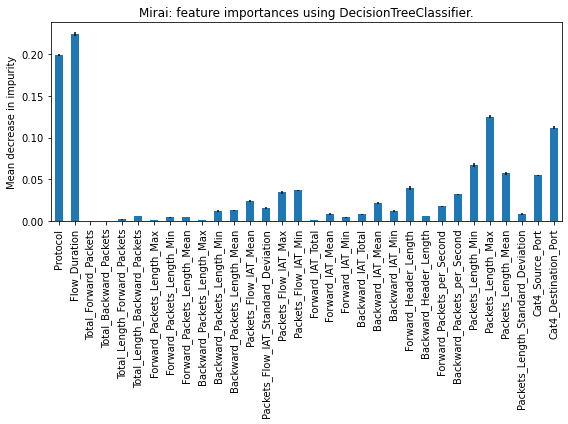

In [115]:
target_name = 'Mirai'
mirai = run_experiment('Mirai')

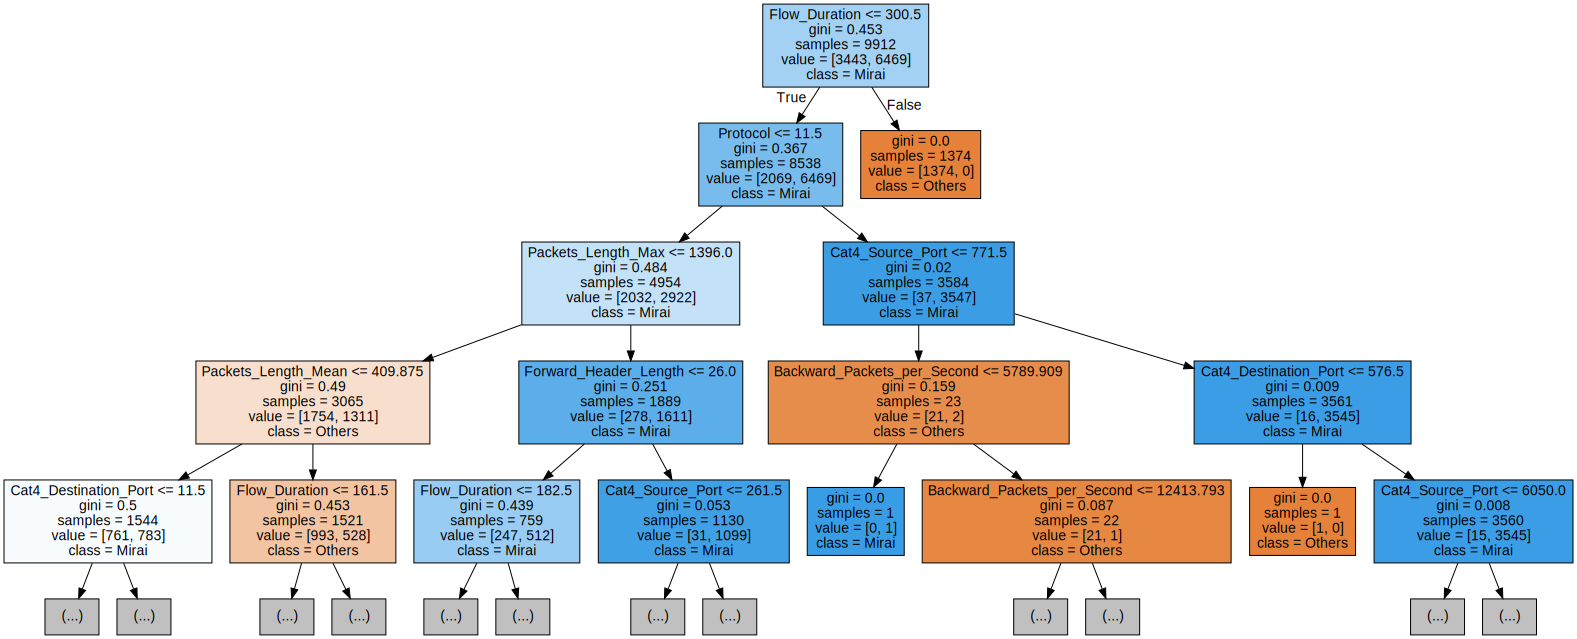

In [116]:
mirai['dt']['graph']

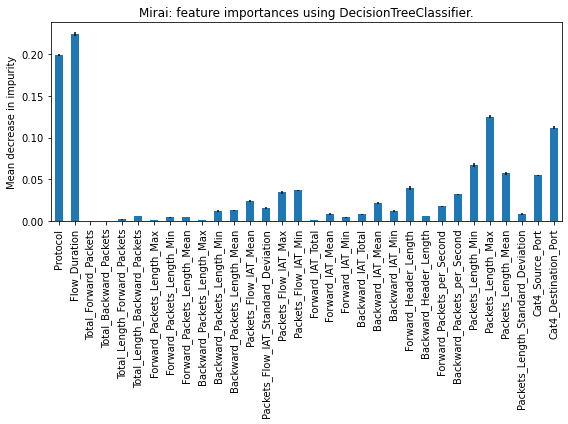

In [ ]:
target_name = 'Mirai'

# the column containing the target: 1 for 'target_name' and 0 for others
y = ohe_classes[target_name]

# dictionary for collecting the results
mirai = {}
mirai['target_name'] = target_name
mirai['y'] = y

# the models dictionaty contains only one model
# but more models could be analysed
for name, algo in models.items():
    model, d_permutation_importance = model_and_feature_importances(algo,X, y,
                                                                    target_name=target_name)
    mirai[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

As we can see from the barplot most of the features have some importance for detecting the 'Mirai' attack.

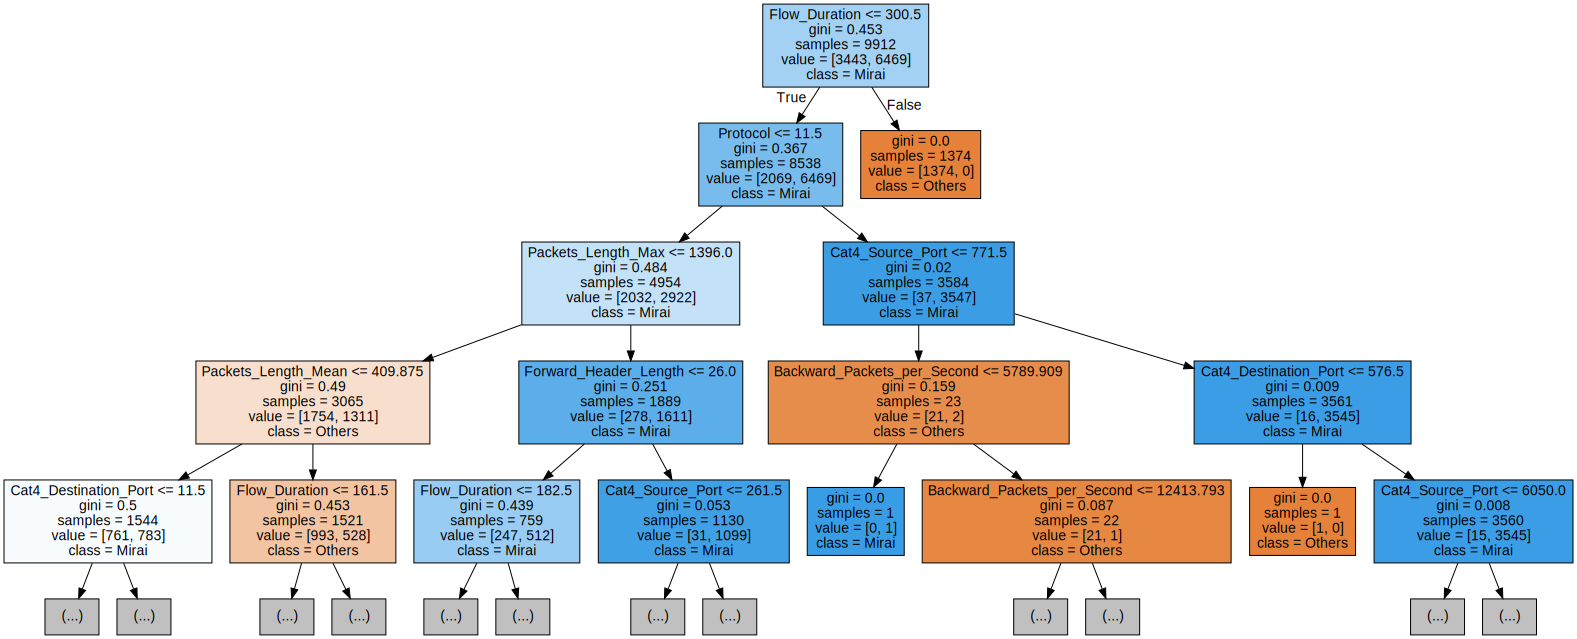

In [44]:
# visualizing the trained decision tree

# get the model
dtree = mirai['dt']['model']

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph and save it in the dictionary
mirai['dt']['graph'] = graphviz.Source(dot_data, format="png") 
mirai['dt']['graph']

In [96]:
# choose features that have importance > 0.0
d_permutation_importance = mirai['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()

# save chosen features in the dictionary
mirai['dt']['chosen_features'] = chosen_features

In [97]:
print(f"{len(chosen_features)} features out of {X.shape[1]} have importance.")
chosen_features

30 features out of 32 have importance.


['Protocol',
 'Flow_Duration',
 'Total_Length_Forward_Packets',
 'Total_Length_Backward_Packets',
 'Forward_Packets_Length_Max',
 'Forward_Packets_Length_Min',
 'Forward_Packets_Length_Mean',
 'Backward_Packets_Length_Max',
 'Backward_Packets_Length_Min',
 'Backward_Packets_Length_Mean',
 'Packets_Flow_IAT_Mean',
 'Packets_Flow_IAT_Standard_Deviation',
 'Packets_Flow_IAT_Max',
 'Packets_Flow_IAT_Min',
 'Forward_IAT_Total',
 'Forward_IAT_Mean',
 'Forward_IAT_Min',
 'Backward_IAT_Total',
 'Backward_IAT_Mean',
 'Backward_IAT_Min',
 'Forward_Header_Length',
 'Backward_Header_Length',
 'Forward_Packets_per_Second',
 'Backward_Packets_per_Second',
 'Packets_Length_Min',
 'Packets_Length_Max',
 'Packets_Length_Mean',
 'Packets_Length_Standard_Deviation',
 'Cat4_Source_Port',
 'Cat4_Destination_Port']

In [98]:
print(f"Not relevant features: {set(X.columns).difference(set(chosen_features))} ")

Not relevant features: {'Total_Forward_Packets', 'Total_Backward_Packets'} 


In [99]:
# retrain the model on chosen features
dtree.fit(X[chosen_features],y)

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

# save the model and the its graph
mirai['dt']['refitted_model'] = dtree

# Draw graph
mirai['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 

### Comments on the decision tree plot

The algorithm considers 'Flow_Duration' to be the most relevant feature and puts it into the root of the tree. 



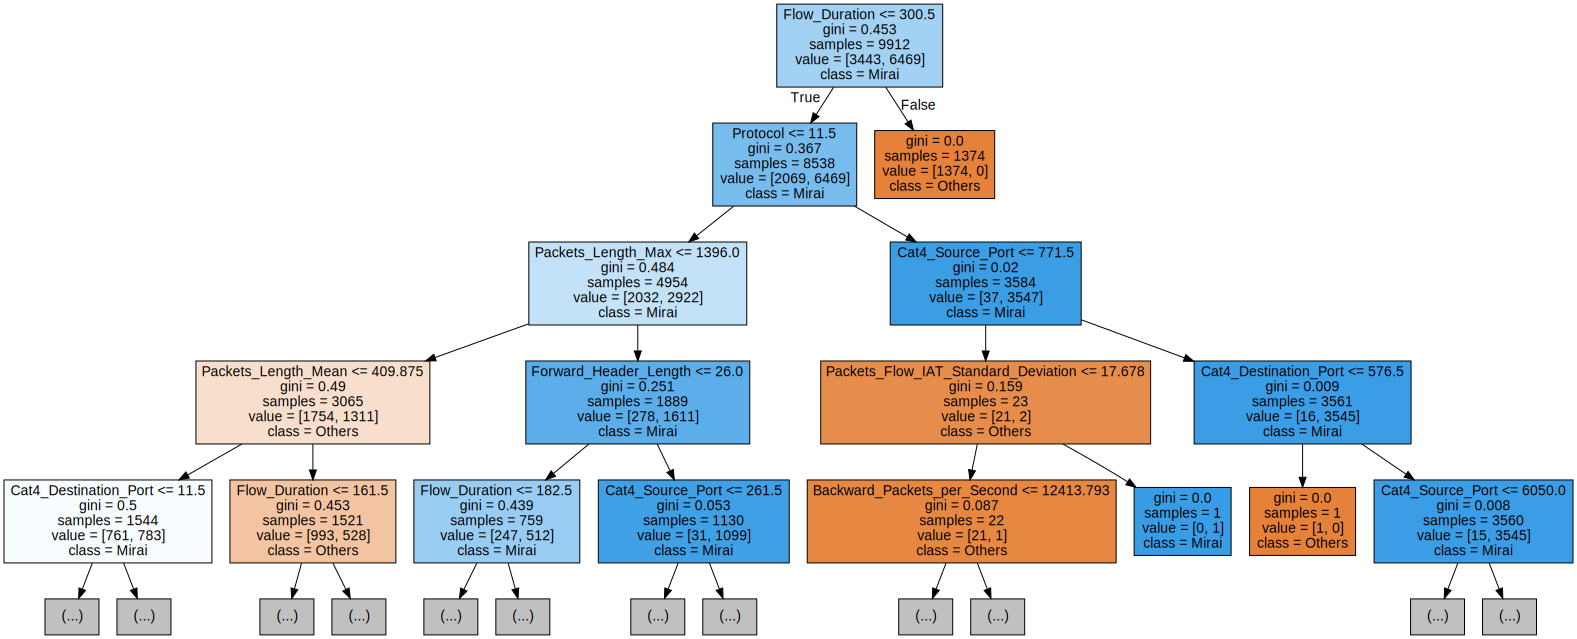

In [92]:
mirai['dt']['refitted_graph']

## Attack - Scan

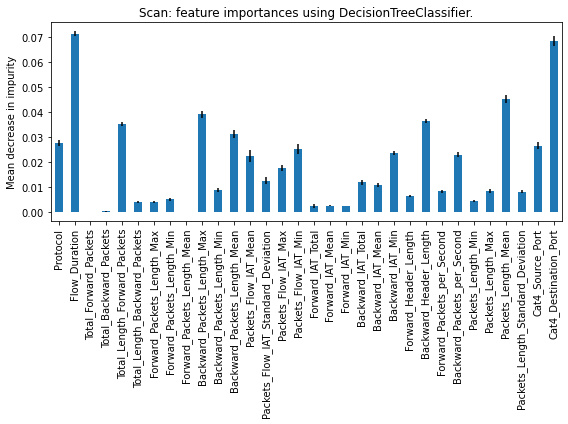

In [55]:
target_name = 'Scan'

# the column containing the target: 1 for 'target_name' and 0 for others
y = ohe_classes[target_name]

# dictionary for collecting the results
scan = {}
scan['target_name'] = target_name
scan['y'] = y

# the models dictionaty contains only one model
# but more models could be analysed
for name, algo in models.items():
    model, d_permutation_importance = model_and_feature_importances(algo,X, y,
                                                                    target_name=target_name)
    scan[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

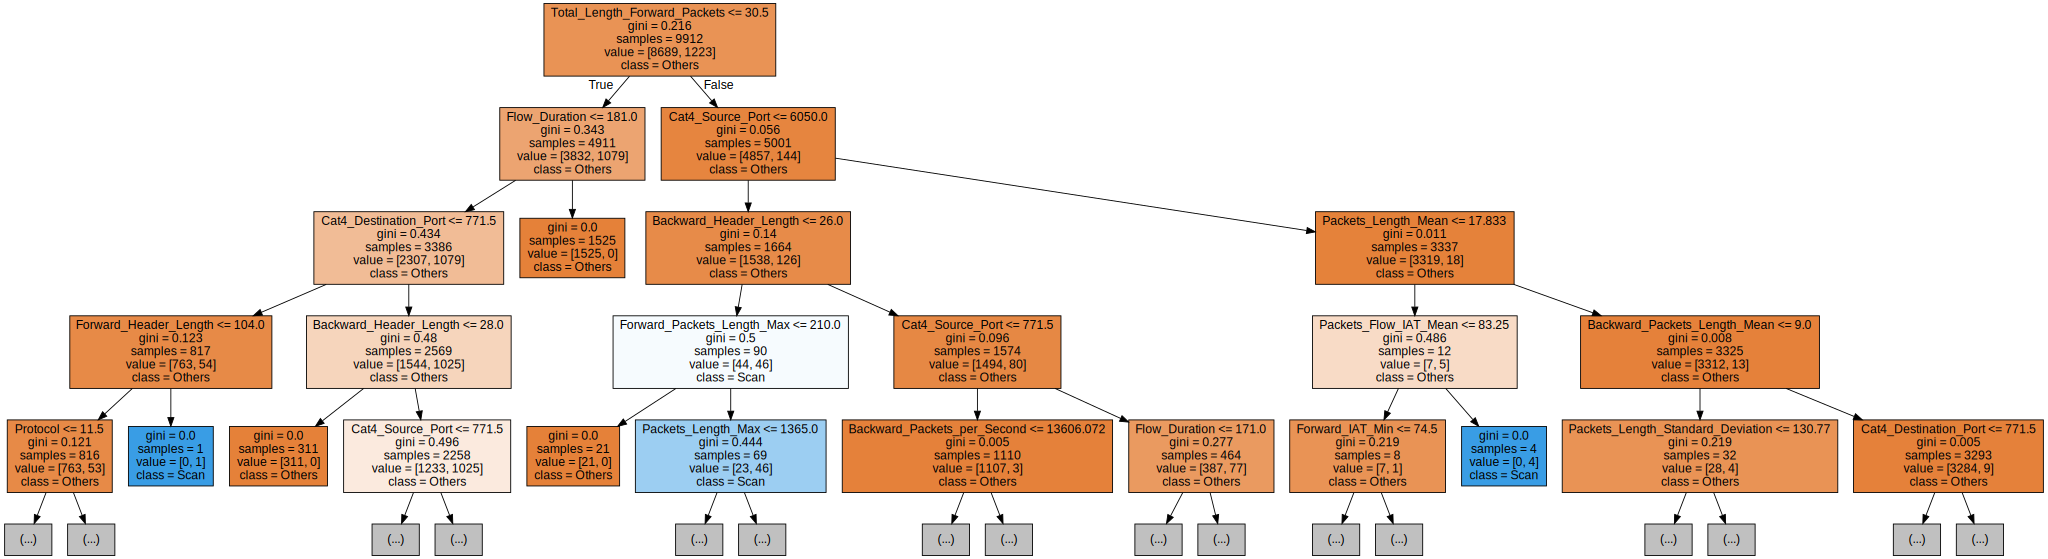

In [56]:
# visualizing the trained decision tree

# get the model
dtree = scan['dt']['model']

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph and save it in the dictionary
scan['dt']['graph'] = graphviz.Source(dot_data, format="png") 
scan['dt']['graph']

In [57]:
# choose features that have importance > 0.0
d_permutation_importance = scan['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()

# save chosen features in the dictionary
scan['dt']['chosen_features'] = chosen_features

In [58]:
chosen_features

['Protocol',
 'Flow_Duration',
 'Total_Backward_Packets',
 'Total_Length_Forward_Packets',
 'Total_Length_Backward_Packets',
 'Forward_Packets_Length_Max',
 'Forward_Packets_Length_Min',
 'Backward_Packets_Length_Max',
 'Backward_Packets_Length_Min',
 'Backward_Packets_Length_Mean',
 'Packets_Flow_IAT_Mean',
 'Packets_Flow_IAT_Standard_Deviation',
 'Packets_Flow_IAT_Max',
 'Packets_Flow_IAT_Min',
 'Forward_IAT_Total',
 'Forward_IAT_Mean',
 'Forward_IAT_Min',
 'Backward_IAT_Total',
 'Backward_IAT_Mean',
 'Backward_IAT_Min',
 'Forward_Header_Length',
 'Backward_Header_Length',
 'Forward_Packets_per_Second',
 'Backward_Packets_per_Second',
 'Packets_Length_Min',
 'Packets_Length_Max',
 'Packets_Length_Mean',
 'Packets_Length_Standard_Deviation',
 'Cat4_Source_Port',
 'Cat4_Destination_Port']

In [59]:
print(f"Not relevant features: {set(X.columns).difference(set(chosen_features))} ")

Not relevant features: {'Total_Forward_Packets', 'Forward_Packets_Length_Mean'} 


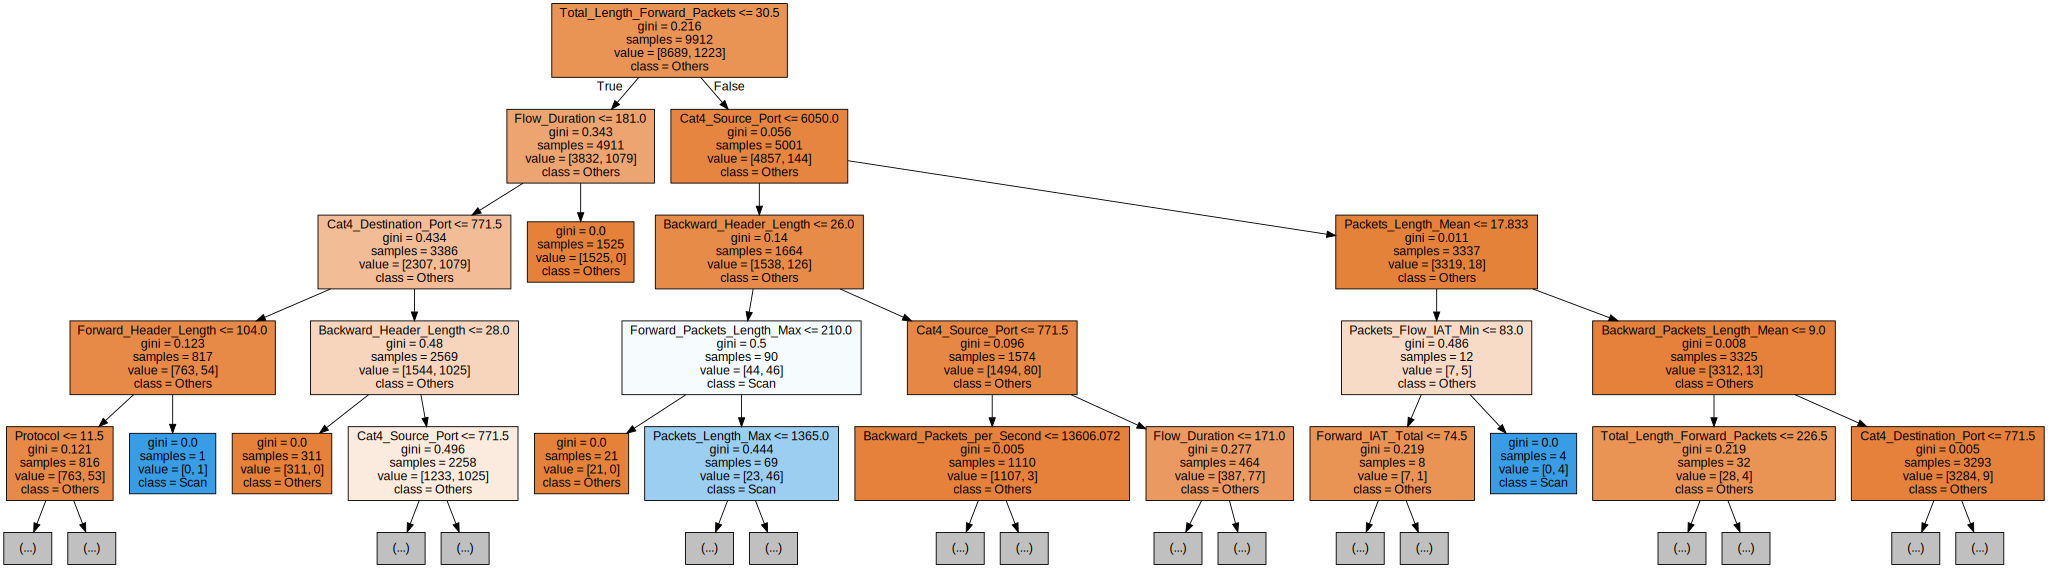

In [60]:
# retrain the model on chosen features
dtree.fit(X[chosen_features],y)

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

# save the model and the its graph
scan['dt']['refitted_model'] = dtree

# Draw graph
scan['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
scan['dt']['refitted_graph']

## Attack - DoS

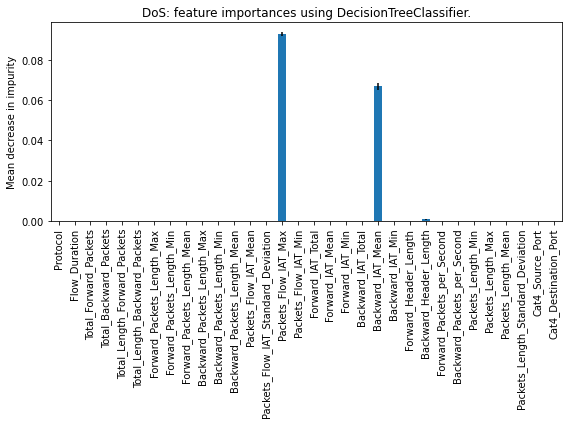

In [61]:
target_name = 'DoS'

# the column containing the target: 1 for 'target_name' and 0 for others
y = ohe_classes[target_name]

# dictionary for collecting the results
dos = {}
dos['target_name'] = target_name
dos['y'] = y

# the models dictionaty contains only one model
# but more models could be analysed
for name, algo in models.items():
    model, d_permutation_importance = model_and_feature_importances(algo,X, y,
                                                                    target_name=target_name)
    dos[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

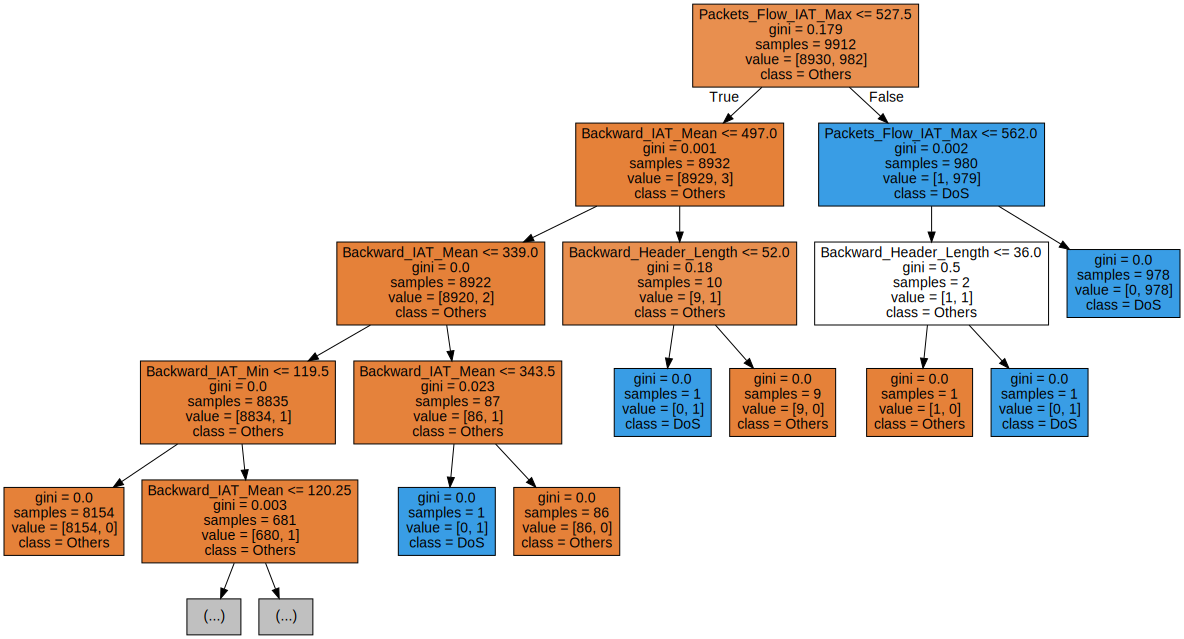

In [62]:
# visualizing the trained decision tree

# get the model
dtree = dos['dt']['model']

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph and save it in the dictionary
dos['dt']['graph'] = graphviz.Source(dot_data, format="png") 
dos['dt']['graph']

In [63]:
# choose features that have importance > 0.0
d_permutation_importance = dos['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()

# save chosen features in the dictionary
dos['dt']['chosen_features'] = chosen_features

In [64]:
chosen_features

['Packets_Flow_IAT_Max', 'Backward_IAT_Mean', 'Backward_Header_Length']

In [65]:
print(f"Not relevant features: {set(X.columns).difference(set(chosen_features))} ")

Not relevant features: {'Forward_IAT_Total', 'Total_Forward_Packets', 'Forward_Packets_Length_Mean', 'Total_Backward_Packets', 'Forward_IAT_Min', 'Forward_Packets_Length_Min', 'Packets_Length_Min', 'Packets_Length_Standard_Deviation', 'Cat4_Source_Port', 'Total_Length_Forward_Packets', 'Backward_Packets_Length_Min', 'Backward_IAT_Total', 'Protocol', 'Total_Length_Backward_Packets', 'Forward_Packets_Length_Max', 'Packets_Length_Mean', 'Backward_Packets_per_Second', 'Packets_Length_Max', 'Packets_Flow_IAT_Standard_Deviation', 'Packets_Flow_IAT_Min', 'Packets_Flow_IAT_Mean', 'Backward_Packets_Length_Mean', 'Forward_IAT_Mean', 'Cat4_Destination_Port', 'Backward_Packets_Length_Max', 'Forward_Header_Length', 'Flow_Duration', 'Backward_IAT_Min', 'Forward_Packets_per_Second'} 


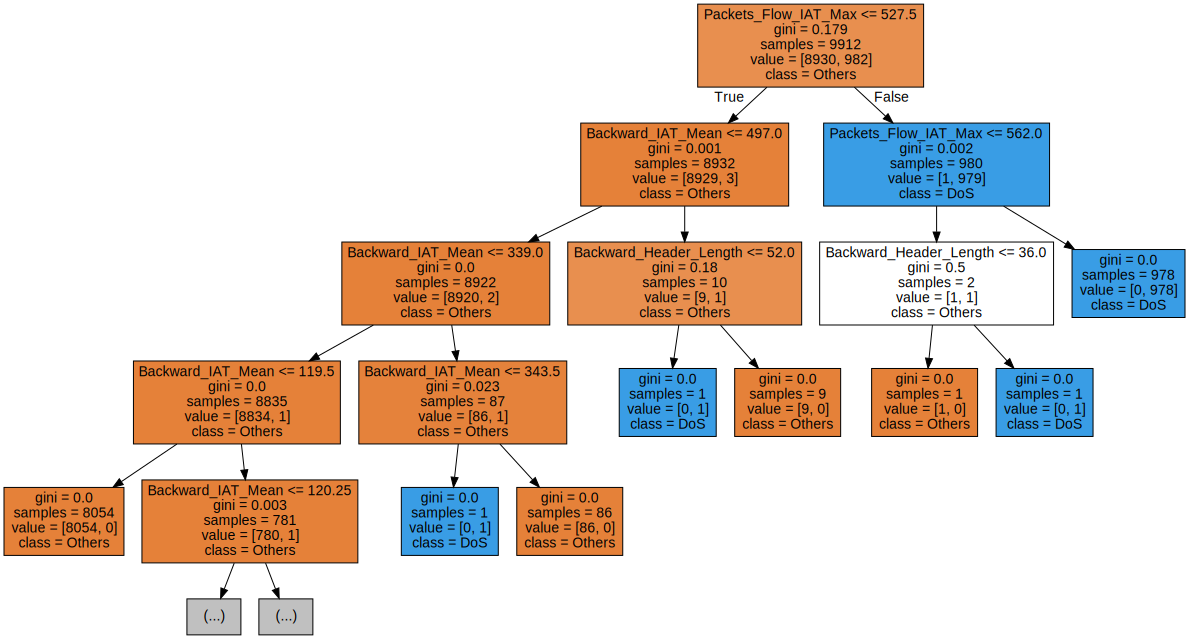

In [66]:
# retrain the model on chosen features
dtree.fit(X[chosen_features],y)

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

# save the model and the its graph
dos['dt']['refitted_model'] = dtree

# Draw graph
dos['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
dos['dt']['refitted_graph']

## Normal traffic 

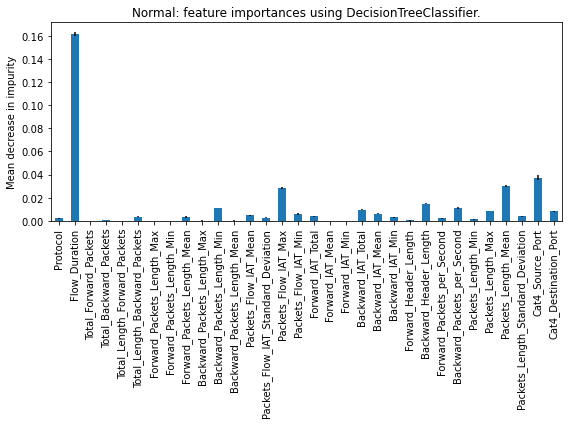

In [67]:
target_name = 'Normal'

# the column containing the target: 1 for 'target_name' and 0 for others
y = ohe_classes[target_name]

# dictionary for collecting the results
normal = {}
normal['target_name'] = target_name
normal['y'] = y

# the models dictionaty contains only one model
# but more models could be analysed
for name, algo in models.items():
    model, d_permutation_importance = model_and_feature_importances(algo,X, y,
                                                                    target_name=target_name)
    normal[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

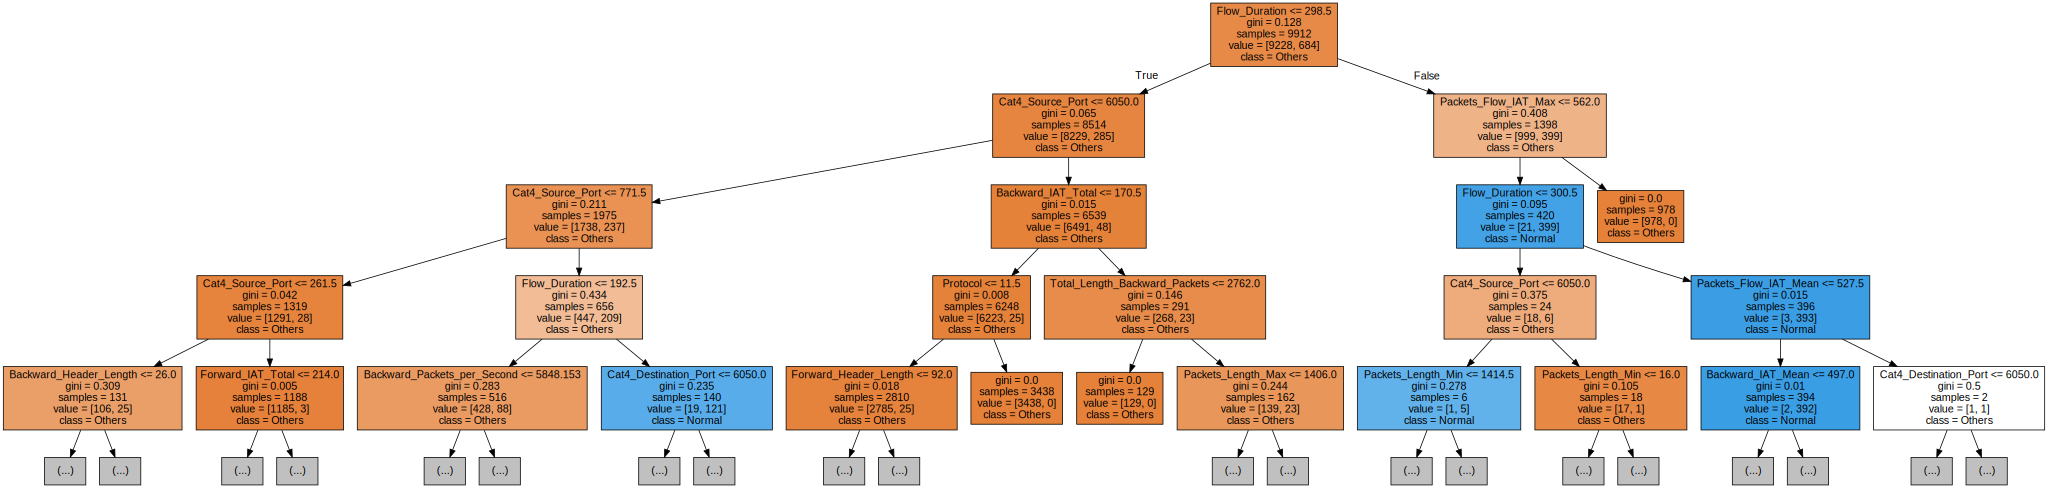

In [68]:
# visualizing the trained decision tree

# get the model
dtree = normal['dt']['model']

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph and save it in the dictionary
normal['dt']['graph'] = graphviz.Source(dot_data, format="png") 
normal['dt']['graph']

In [69]:
# choose features that have importance > 0.0
d_permutation_importance = normal['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()

# save chosen features in the dictionary
normal['dt']['chosen_features'] = chosen_features

In [70]:
chosen_features

['Protocol',
 'Flow_Duration',
 'Total_Backward_Packets',
 'Total_Length_Forward_Packets',
 'Total_Length_Backward_Packets',
 'Forward_Packets_Length_Mean',
 'Backward_Packets_Length_Max',
 'Backward_Packets_Length_Min',
 'Backward_Packets_Length_Mean',
 'Packets_Flow_IAT_Mean',
 'Packets_Flow_IAT_Standard_Deviation',
 'Packets_Flow_IAT_Max',
 'Packets_Flow_IAT_Min',
 'Forward_IAT_Total',
 'Backward_IAT_Total',
 'Backward_IAT_Mean',
 'Backward_IAT_Min',
 'Forward_Header_Length',
 'Backward_Header_Length',
 'Forward_Packets_per_Second',
 'Backward_Packets_per_Second',
 'Packets_Length_Min',
 'Packets_Length_Max',
 'Packets_Length_Mean',
 'Packets_Length_Standard_Deviation',
 'Cat4_Source_Port',
 'Cat4_Destination_Port']

In [71]:
print(f"Not relevant features: {set(X.columns).difference(set(chosen_features))} ")

Not relevant features: {'Total_Forward_Packets', 'Forward_IAT_Min', 'Forward_Packets_Length_Max', 'Forward_IAT_Mean', 'Forward_Packets_Length_Min'} 


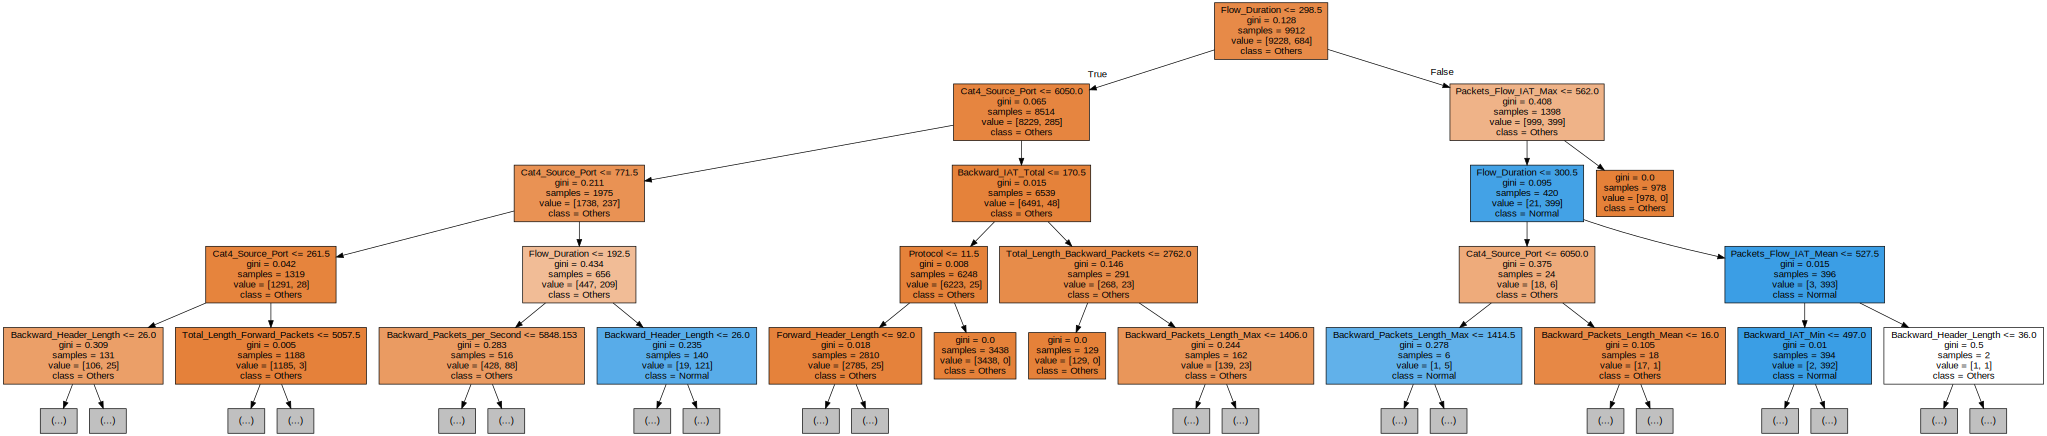

In [72]:
# retrain the model on chosen features
dtree.fit(X[chosen_features],y)

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

# save the model and the its graph
normal['dt']['refitted_model'] = dtree

# Draw graph
normal['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
normal['dt']['refitted_graph']

## Spoofing

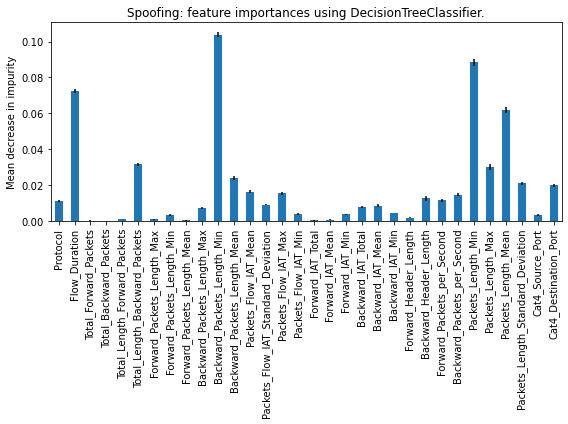

In [73]:
target_name = 'Spoofing'

# the column containing the target: 1 for 'target_name' and 0 for others
y = ohe_classes[target_name]

# dictionary for collecting the results
spoofing = {}
spoofing['target_name'] = target_name
spoofing['y'] = y

# the models dictionaty contains only one model
# but more models could be analysed
for name, algo in models.items():
    model, d_permutation_importance = model_and_feature_importances(algo,X, y,
                                                                    target_name=target_name)
    spoofing[name] = {'model': model,\
                   'permutation_importance': d_permutation_importance}

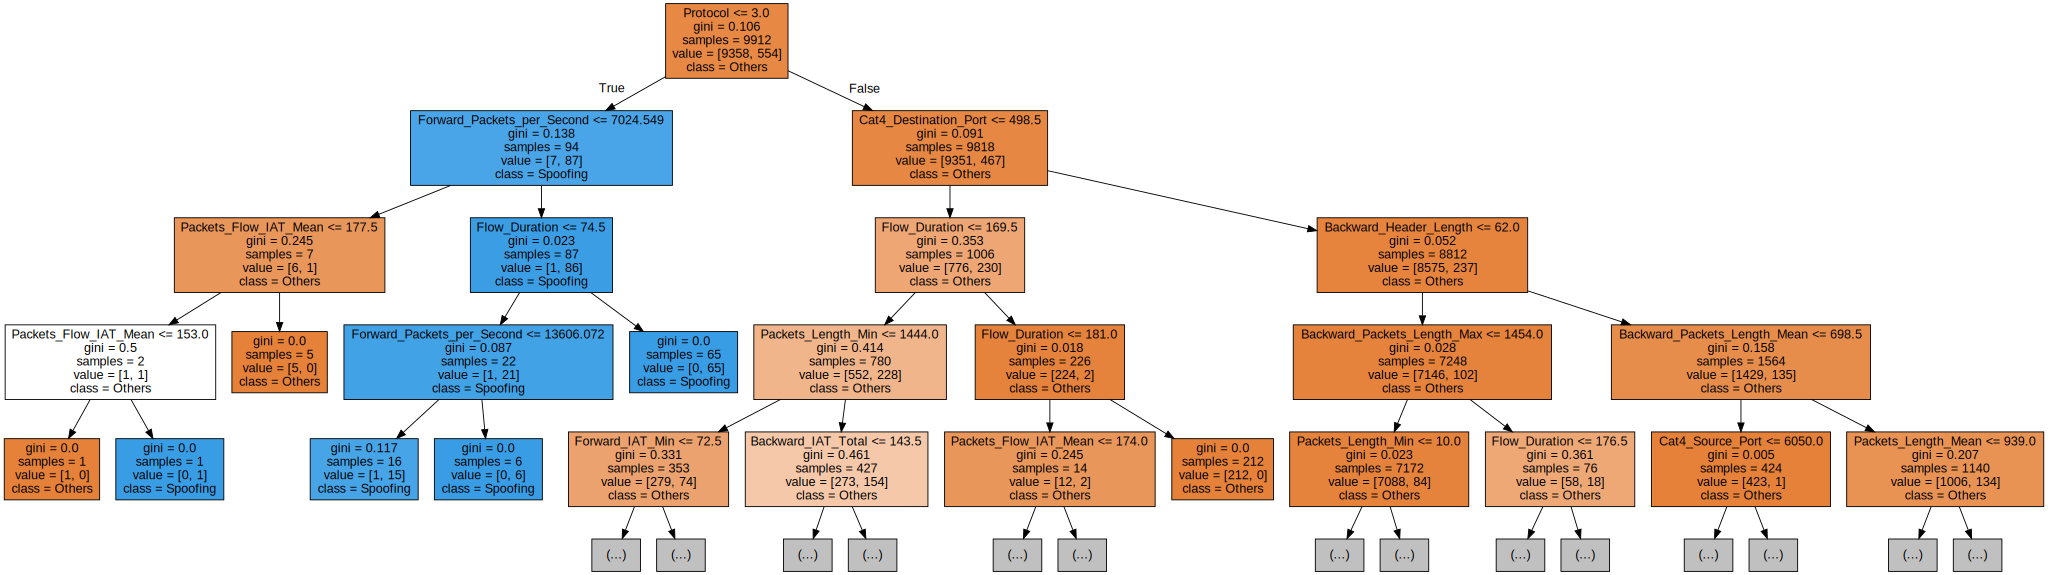

In [74]:
# visualizing the trained decision tree

# get the model
dtree = spoofing['dt']['model']

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=X.columns.tolist(),  
                                class_names=['Others',target_name],
                                filled=True)

# Draw graph and save it in the dictionary
spoofing['dt']['graph'] = graphviz.Source(dot_data, format="png") 
spoofing['dt']['graph']

In [75]:
# choose features that have importance > 0.0
d_permutation_importance = spoofing['dt']['permutation_importance'] 
chosen_features = X.columns[d_permutation_importance['importances_mean'] > 0.0].tolist()

# save chosen features in the dictionary
spoofing['dt']['chosen_features'] = chosen_features

In [76]:
chosen_features

['Protocol',
 'Flow_Duration',
 'Total_Forward_Packets',
 'Total_Length_Forward_Packets',
 'Total_Length_Backward_Packets',
 'Forward_Packets_Length_Max',
 'Forward_Packets_Length_Min',
 'Forward_Packets_Length_Mean',
 'Backward_Packets_Length_Max',
 'Backward_Packets_Length_Min',
 'Backward_Packets_Length_Mean',
 'Packets_Flow_IAT_Mean',
 'Packets_Flow_IAT_Standard_Deviation',
 'Packets_Flow_IAT_Max',
 'Packets_Flow_IAT_Min',
 'Forward_IAT_Total',
 'Forward_IAT_Mean',
 'Forward_IAT_Min',
 'Backward_IAT_Total',
 'Backward_IAT_Mean',
 'Backward_IAT_Min',
 'Forward_Header_Length',
 'Backward_Header_Length',
 'Forward_Packets_per_Second',
 'Backward_Packets_per_Second',
 'Packets_Length_Min',
 'Packets_Length_Max',
 'Packets_Length_Mean',
 'Packets_Length_Standard_Deviation',
 'Cat4_Source_Port',
 'Cat4_Destination_Port']

In [77]:
print(f"Not relevant features: {set(X.columns).difference(set(chosen_features))} ")

Not relevant features: {'Total_Backward_Packets'} 


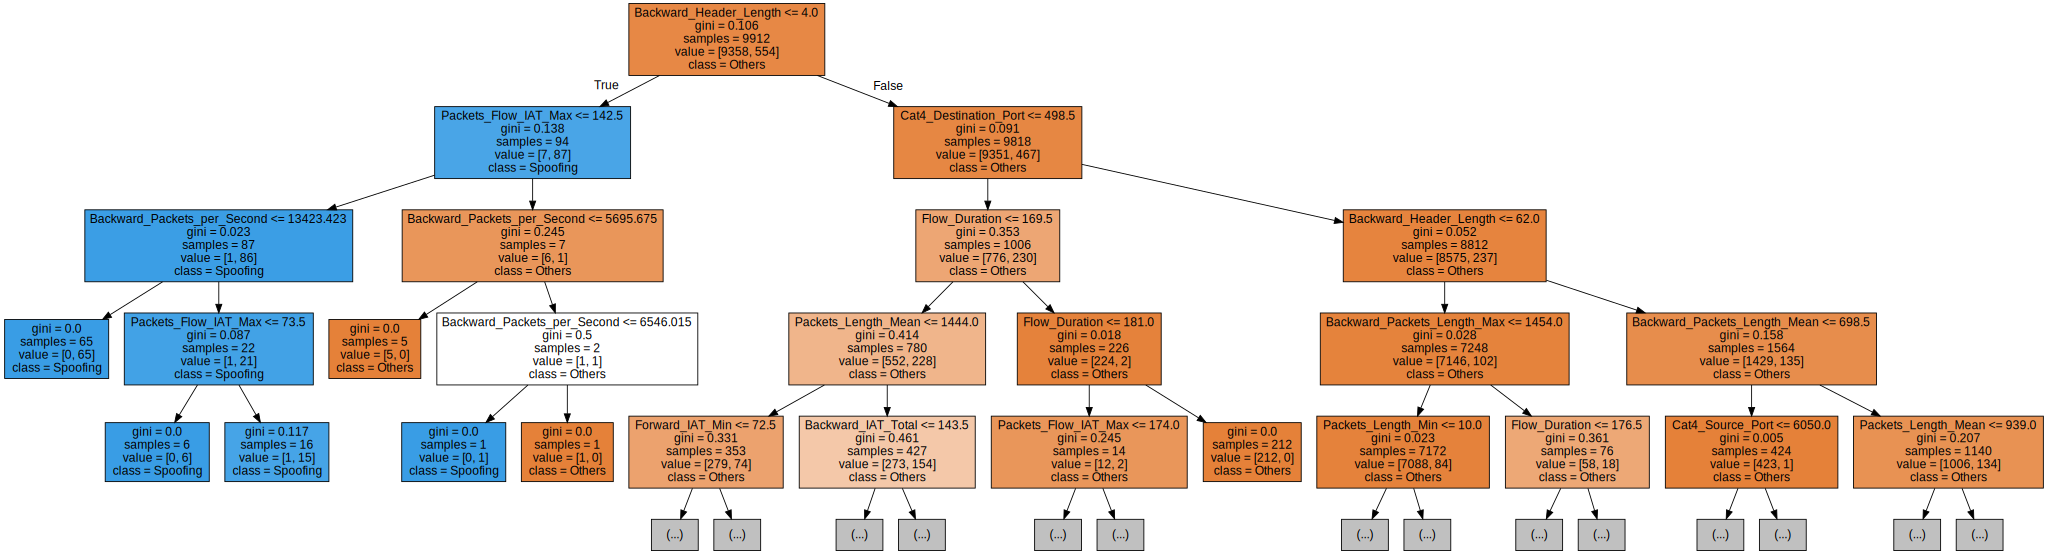

In [78]:
# retrain the model on chosen features
dtree.fit(X[chosen_features],y)

# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, max_depth=4,
                                feature_names=chosen_features,  
                                class_names=['Others',target_name],
                                filled=True)

# save the model and the its graph
spoofing['dt']['refitted_model'] = dtree

# Draw graph
spoofing['dt']['refitted_graph'] = graphviz.Source(dot_data, format="png") 
spoofing['dt']['refitted_graph']

## Saving results

In [79]:
import joblib

In [91]:
# saving dictionaries with results to serialized files

joblib.dump(mirai, 'mirai_dtree_results.dat')
joblib.dump(scan, 'scan_dtree_results.dat')
joblib.dump(dos, 'dos_dtree_results.dat')
joblib.dump(normal, 'normal_dtree_results.dat')
joblib.dump(spoofing, 'spoofing_dtree_results.dat')

# read files back into Jupyter with
# results_object = joblib.load(results_filename)

# Conclusion

# References

1. [Variable Importance based on reduction of Gini on OOB](https://cran.r-project.org/web/packages/rfVarImpOOB/vignettes/rfVarImpOOB-vignette.html)
2. [Feature Importance Measures for Tree Models — Part I](https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3)
3. [Understanding Shapley value explanation algorithms for trees](https://hughchen.github.io/its_blog/index.html)
4. [Introducing SHAP Decision Plots](https://towardsdatascience.com/introducing-shap-decision-plots-52ed3b4a1cba)
5. [SHAP Part 3: Tree SHAP](https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b)